[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Poisson.ipynb)

# Definition

The Poisson distribution is a discrete probability distribution that describes the probability of obtaining a given number of events occurring in a fixed interval (can be time or space, but here we focus on time) if the events occur at a known, constant rate and independently from event-to-event.

A Poisson process (or, equivalently, Poisson point process) is a process that generates events that can be described by a Poisson distribution. For more details, see the examples below and **Ruminations on Randomness in the Exponential discussion**, which describes relationships between a Poisson point process and the exponential distribution (specifically, the number of generated events within a fixed interval follows a Poisson distribution).

Mathematically, the Poisson probability distribution describes the probability of obtaining *k* events (for different values of *k*) as a function of a single parameter, the underlying rate $\lambda$ (lambda):

$P(k\:events\:in\:the\:given\:interval\:|\:\lambda ) = e^{-\lambda}\frac{\lambda^{k}}{k!}$

where *k*! = *k* * (*k*–1) * (*k* – 2) ... * 2 * 1 is the factorial of *k*.

In the case in which the number of events that occur within a particular interval of time, denoted $\Delta t$, it is typical to express the rate  in units of events/time. This formulation implies that the probability distribution should be computed by scaling the rate by the amount of time in the given interval:

$P(k\:|\:\lambda, \Delta t ) = e^{-\lambda \Delta t}\frac{(\lambda \Delta t)^k}{k!}$

# Getting Started with Code


Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Probability Distributions/Poisson.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [1]:
import numpy as np
from scipy.stats import binom
from scipy.stats import poisson
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output


# Tutorial

The Poisson distribution is closely related to the binomial distribution. In both cases, they measure the number of "successes" (or binary events) within a given interval. For the binomial distribution, these events occur within discrete "attempts" (that is, within individaul Bernoulli trials) that we assume occur at regularly spaced times throughout the full interval. For the Poisson distribution, these events can occur at any time in the interval. Thus, the Poisson distribution describes the case in which the time between Bernoulli "attempts" or trials -> zero (the "->" reads as "approaches"). This is equivalent to saying that the number of attempts approaces infinity. 

This is a CONTINUOUS distribution because it describes the probability of any possible time of an event occurring within the given interval.

Let's examine the relationship between the Poisson pdf and binomial pdf by introducing the concept of a Poisson point process (PPP). A PPP is a process that generates binary events at a constant RATE lambda. The key here is that time is contininuous, so probability cannot be determined with respect to a fixed time but rather a fixed time interval (because any fixed time is infinitesimally small).  Thus, we think of events occuring at some rate (mean number of events per unit time) as opposed to a probability (probability of occurrance of the event at a given time). The number of events that the PPP generates in a given interval is a random variable that is distributed as a Poisson pdf (i.e., a PPP is a way of generating a Poisson PDF).

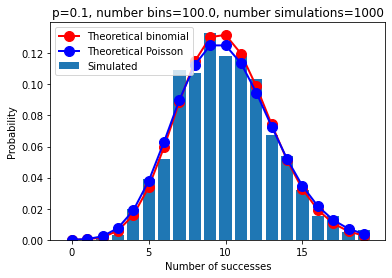

In [2]:
# Make an animation comparing binomial and Poisson distributions

# The Poisson process is defined by a rate, lambda, of events/sec 
#   (call it plambda to avoid Python lambda)
plambda = 1

# We will consider events generated in a given fixed interval, in seconds.
delta_t = 10

# Define an axis for computing and plotting a histogram of counts
max_successes = 20
bins = np.arange(-0.5, max_successes+0.5, 1)
xaxis = (bins[1:] + bins[:-1])/2

# Number of simulations
num_simulations = 1000

# Loop through different numbers of time bins used to divide up the given 
#   interval. Remember this is how we will show the transition from a binomial 
#   to a Poisson pdf describing the number of events in the interval: as the 
#   number of bins gets larger, the simulation gets closer to considering 
#   events occurring at any time and thus the distribution gets closer to Poisson
f = plt.figure()
for n in np.round(np.linspace(1, 100, max_successes)):
   
   # Check for events in each bin    
   #    Scale p so that it is probability of events/bin, not events/sec -- 
   #    which can be at most =1.
   p = np.minimum(plambda * delta_t/n, 1)

   # Simulate outcomes as the number of events that occurred in the n bins 
   #    ("tries"), given p and done N times.
   outcomes = binom.rvs(int(n), p, size=num_simulations)

   # Make a histogram of the outcomes, using the array of counts ("xaxis") 
   #    we defined above.
   counts, edges = np.histogram(outcomes, bins)

   # Show a normalized version that is a pdf. Here counts (the x-axis of the 
   #    histogram) is a DISCRETE variable, so we just have to add up the values
   plt.bar(xaxis, counts/counts.sum())

   # Plot the theoretical binomial pdf, for the values in xaxis and given n and p.
   binoY = binom.pmf(xaxis, n, p)

   # Show in RED
   plt.plot(xaxis, binoY, 'ro-', linewidth=2, markersize=10)

   # Get the equivalent Poisson pdf using the rate computed for the full 
   #    interval: lambda * deltaT
   poissY = poisson.pmf(xaxis, plambda*delta_t)

   # Show in BLUE
   plt.plot(xaxis, poissY, 'bo-', linewidth=2, markersize=10)

   # Labels, etc
   # plt.axis([xaxis([0]), xaxis([-1]), 0, np.maximum(poissY)+0.1])
   plt.title(f'p={p:.1f}, number bins={n}, number simulations={num_simulations}')
   plt.xlabel('Number of successes')
   plt.xticks(np.arange(0, max_successes, 5))
   plt.ylabel('Probability')
   plt.legend(['Theoretical binomial', 'Theoretical Poisson', 'Simulated'], loc='upper left')
   plt.show()

   # Wait
   time.sleep(0.5)

   # Clear for next plot
   clear_output(wait=True)

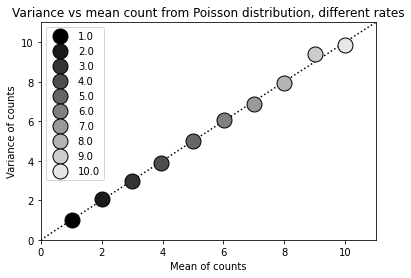

In [ ]:
# An interesting property of a Poisson distributon is that var = mean. 
#   Let's try it using simulations!

# Set up simulations using various values of lambda
num_lambdas = 10
lambdas = np.linspace(1,10,num_lambdas)
N = 10000 # number of simulations per condition

# Set up plot
f = plt.figure()
plt.axis([0, np.amax(lambdas)+1, 0, np.amax(lambdas)+1])
plt.plot([0, np.amax(lambdas)+1], [0, np.amax(lambdas)+1], 'k:')

# Show labels
plt.xlabel('Mean of counts')
plt.ylabel('Variance of counts')
plt.title('Variance vs mean count from Poisson distribution, different rates')

# Save plot objects to make legend

# cycle through different values of lambda
for idx, val in enumerate(lambdas):
   
   # Get the counts
   counts = poisson.rvs(val, size=N)
   
   # Plot var vs mean, with grayscale to indicate lambda
   plt.plot(np.mean(counts), np.var(counts), 'ko', markersize=15, \
            markerfacecolor=str(idx/num_lambdas), label=str(val))

# Show legend for grayscale values = different rates (lambdas)
# strs = cellstr(num2str(lambdas'));
plt.legend()

number of events expected=1000, actual=1009


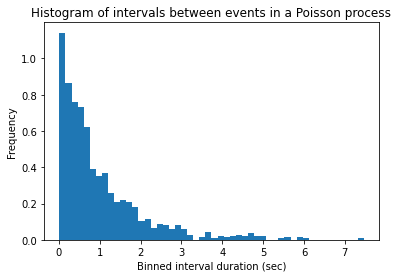

In [ ]:
# Let's go back to simulating a Poisson process as the limit of a sequence of Bernoulli trials as the interval size->0. 
delta_t = 1000          # Assume the whole process takes this long
plambda = 1             # Rate (events per sec)
num_bins_per_second = 100    # Number of bins in which to check for events
total_bins = round(num_bins_per_second*delta_t)

# First convert lambda (overall rate) to probability/bin, using deltaT events/time divided by bins/time = events/bin
p = plambda * delta_t / total_bins

# Now simulate checking one "outcome" per bin, using the given probability/bin
outcomes = binom.rvs(1, p, size=total_bins)

# Check that the nubmer of events is what we expect
print(f'number of events expected={plambda*delta_t}, actual={np.sum(outcomes==1)}')

# Now for the next part -- instead of looking at the counts per interval, which is what the Poisson distribution described, we are now going to look at the same data but are considering the intervals between events. As you will see below, these intervals are distributed as an exponential.
# First look at the histogram of intervals between events
# Get intervals
intervals_between_events = np.diff(np.where(outcomes==1))

# Convert to seconds
intervals_between_events_sec = intervals_between_events/num_bins_per_second

# Make and show the normalized histogram. Here the interval is a continuous variable (the x-axis is binned in the histogram to visualize it, but the actual values can take on any continuous value because they represent the amount of time since the previous event), so to normalize the histogram to make a pdf we can't just sum the values -- we have to sum the values multiplied by the bin width (i.e., take the integral). We use numpy's "trapz" which treats each bin as a trapezoid (because the heights before and after can be slightly different) to compute the integral:
counts, edges = np.histogram(intervals_between_events_sec, bins=50)
plt.bar(edges[:-1], np.divide(counts, np.trapz(counts, edges[:-1])), width=0.15, align='edge')
plt.title('Histogram of intervals between events in a Poisson process')
plt.xlabel('Binned interval duration (sec)')
plt.ylabel('Frequency')

# Compare to an exponential distribution (see below), in red, with the rate parameter lambda equal to 1/lambda
# plt.plot(edges[:-1], expon.pdf(edges[:-1], scale=1/plambda), 'r-', linewidth=2)
plt.show()

# Neuroscience Examples

## Example 1: Poisson models of spike generation
Chances are, you have already come across the term Poisson (often as "Poisson point process") in the context of how spikes are generated (useful discussions/notes are [here](http://www.cns.nyu.edu/~david/handouts/poisson.pdf), [here](https://biology.stackexchange.com/questions/56679/why-poisson-process-for-neural-firing), and [here](https://neurophysics.ucsd.edu/courses/physics_171/PoissonLectureNotes.pdf); some of many papers are [here](https://www.sciencedirect.com/science/article/pii/S0006349567865962) and [here](https://www.sciencedirect.com/science/article/pii/S0006349567865974) (from Penn!), [here](https://www.ece.rice.edu/~dhj/pointprocess.pdf), and [here](https://link.springer.com/article/10.1007/s00422-006-0068-6)). 

Here we discuss a bit of [this paper](https://www.nature.com/articles/nn.3711), which addresses the question of how should we interpret the variability that is inherent to all measures of neural activity. Specifically, assume you measure the spiking responses of a single neuron in visual cortex in vivo to repeated presentations of an identical sensory stimulus to which the neuron is tuned. It is well known that, across repeated presentations, the variance of the response is at least as large, if not larger, than the mean of the response (papers [here](https://www.sciencedirect.com/science/article/pii/0006899374904387?via%3Dihub) and [here](http://www.cns.nyu.edu/~tony/Publications/tolhurst-movshon-thompson-1981.pdf)).  The fact that the mean and variance are so close (but not exactly [the same](https://www.jneurosci.org/content/26/3/801), at least in part because of [refractory periods](https://www.jneurosci.org/content/18/6/2200)) is a primary reason why people think of neural spiking as "Poisson-like": for a true Poisson process, the mean and variance are equal. Given that neural spiking is so similar, ongoing work uses models based on Poisson processes to make sense of the signal and noise measured in neural spike trains.

This paper assumes that neural firing is governed by a doubly stochastic process, which is just like this and basically means that there are two factors that determine the rate of the Poisson process: 1) a "drive" term that causes the rate to change when the stimulus is shown; and 2) a "gain" term that represents modulatory influences that occur over trials. The rationale is that these terms allow for a "partitioning" of the trial-to-trial variability: some of it is a result of the stochastic (random) point process that generates the spikes (which, if Poisson, would produce spike counts with mean = variance, as above), and the rest results from the fact that the rate itself is varying from trial-to-trial (the gain term).

Figure 1 from that paper shows that the model accounts well for the fact that certain neurons tend to have higher variability that would be expected from a pure Poisson model:

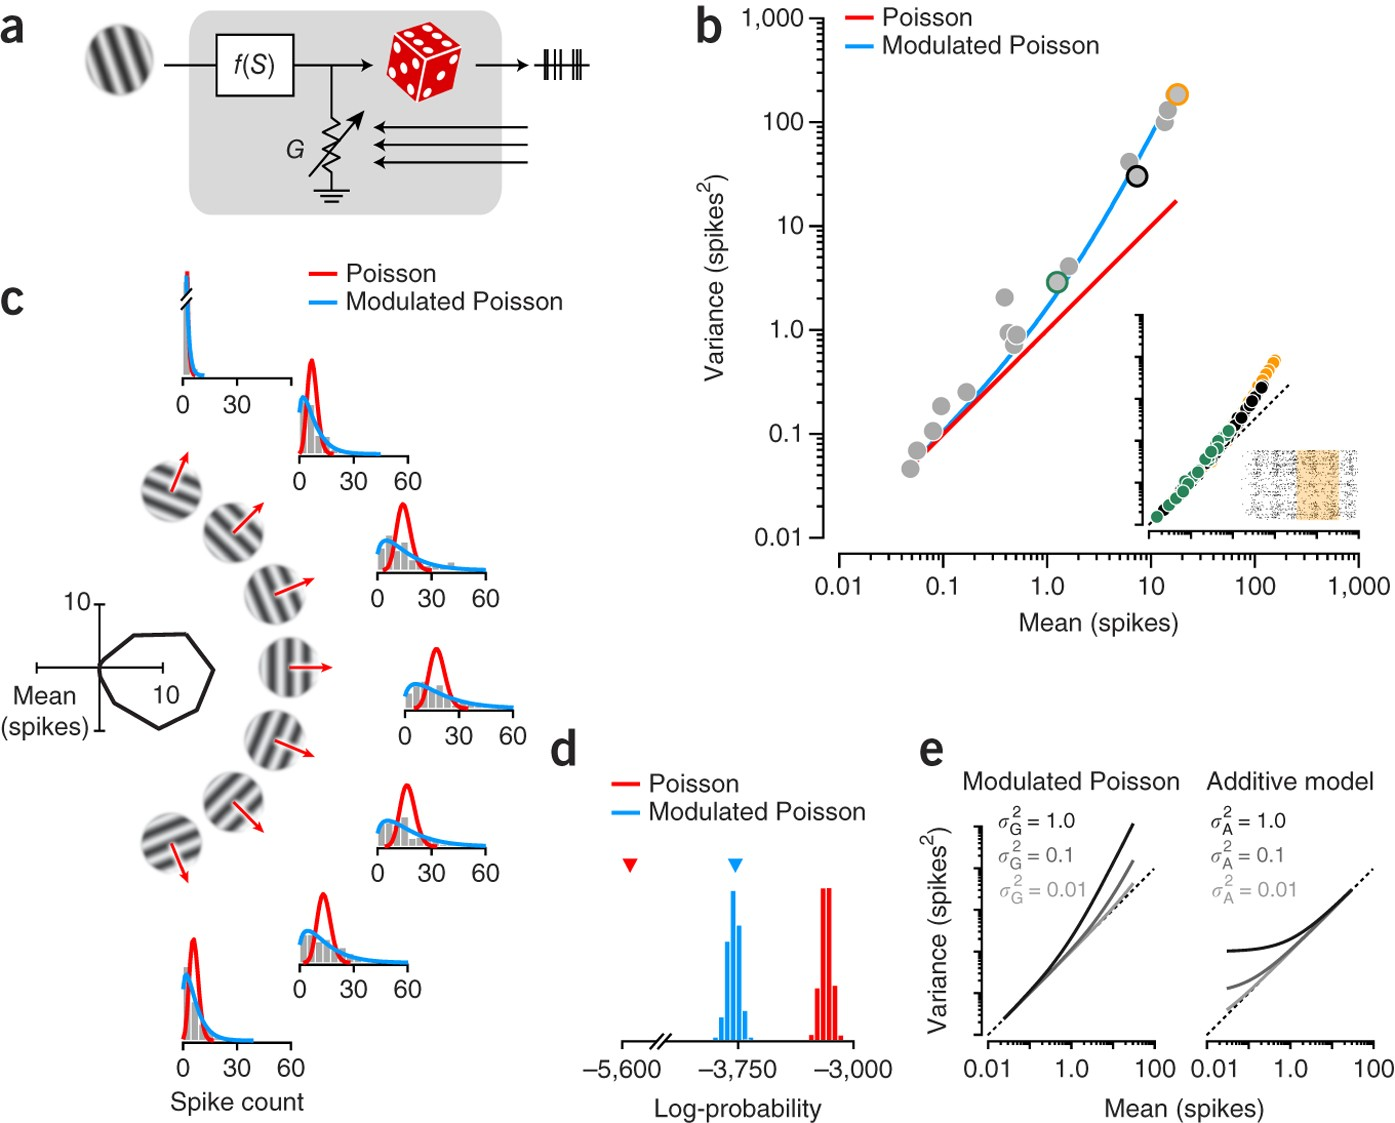

Legend: (a) Model diagram. Spikes are generated by a Poisson process whose rate is the product of two signals: a stimulus-dependent drive, f(S), and a stimulus-independent gain, G, that is assumed to fluctuate slowly relative to the duration of experimental trials. (b) Variance-to-mean relation of the neural responses of a single V1 neuron stimulated with gratings drifting in different directions (gray dots), compared with predictions of the Poisson model (red line) and the modulated Poisson model (blue line). Responses were computed by counting spikes in a 1,000-ms window following response onset. Means and variances were calculated over 125 repetitions of each stimulus. The inset shows this relation measured over variable-duration windows for three drift directions (green, black and orange). Each data point is obtained from a randomly selected epoch of the corresponding raster with duration drawn uniformly from the range 1–1,000 ms (the orange data are taken from the inset raster). (c) Spike count distributions (gray histograms) measured for different stimulus drift directions compared to the best-fitting probability densities of the Poisson (red) and gamma-modulated Poisson (blue) models. (d) Log-probability of the cell responses under the Poisson model (red triangle) and the modulated Poisson model (blue triangle). Histograms illustrate the expected range of the log-probability statistic (computed with a 1,000 run parametric bootstrap) for the Poisson model (red) and the modulated Poisson model (blue). (e) Variance-to-mean relations predicted by the modulated Poisson model and an additive model for weak (light gray) to strong (black) fluctuations in gain.

# Additional Resources

Working with the Poisson distribution in [Matlab](https://www.mathworks.com/help/stats/poisson-distribution.html), [R](https://www.rdocumentation.org/packages/stats/versions/3.3/topics/Poisson), and [Python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania